In [85]:
from pathfinding.core.grid import Grid
from pathfinding.finder.a_star import AStarFinder
from pathfinding.core.diagonal_movement import DiagonalMovement
import matplotlib.pyplot as plt
import numpy as np
import cv2


In [86]:
prediction_path = r"C:\Users\jiric\Documents\VUT\BP\OBRAZKY\General\A star\PATH_C\UBRO93_pred2.png"
image_path = r"C:\Users\jiric\Documents\VUT\BP\OBRAZKY\General\A star\PATH_C\UBRO93_img2.jpg"

prediction_save = r"C:\Users\jiric\Documents\VUT\BP\OBRAZKY\General\A star\PATH_C\UBRO93_pred2_path.jpg"
image_save = r"C:\Users\jiric\Documents\VUT\BP\OBRAZKY\General\A star\PATH_C\UBRO93_img2_path.jpg"

In [87]:
prediction = cv2.imread(prediction_path)
prediction = cv2.cvtColor(prediction, cv2.COLOR_BGR2RGB)
binary_mask = np.zeros([prediction.shape[0], prediction.shape[1],1])
binary_mask[np.all(prediction == [255, 140, 0], axis=-1)] = 1
binary_mask[np.all(prediction == [109, 50, 255], axis=-1)] = 1


print(prediction.shape)
print(binary_mask.shape)
print(np.unique(binary_mask))
print(np.sum(binary_mask))

(2560, 2560, 3)
(2560, 2560, 1)
[0. 1.]
1786337.0


In [88]:
RGB_matrix = np.zeros([prediction.shape[0], prediction.shape[1],3])
RGB_matrix[binary_mask[:,:,0] == 1,:] = [255,255,255]
RGB_matrix[binary_mask[:,:,0] == 0,:] = [0, 0, 0]

cv2.imwrite(prediction_save, RGB_matrix)

True

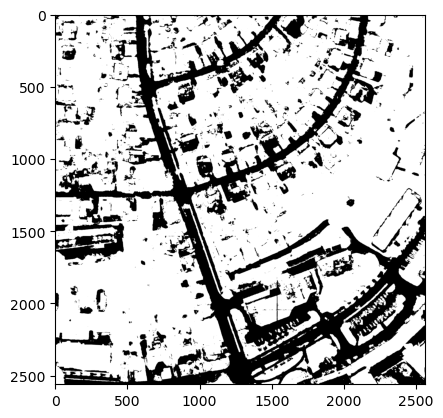

In [89]:
plt.imshow(binary_mask, cmap='binary')

In [90]:
grid = Grid(matrix=binary_mask)

start_x = 1470
start_y = 70

end_x = 2400
end_y = 2100


start = grid.node(start_x, start_y)
end = grid.node(end_x, end_y)

x_cor_se = [start_x, end_x]
y_cor_se = [start_y, end_y]

# create a finder with the movement style
diag_move = DiagonalMovement.always
finder = AStarFinder(diagonal_movement=diag_move)

# returns a list with the path and the amount of times the finder had to run to get the path
path, runs = finder.find_path(start, end, grid)

In [91]:
formatted_coordinates = []
for path in path:
    coordinates = [int(coord) for coord in str(path).split("(")[1].split(" ")[0].split(":")]
    formatted_coordinates.append(coordinates)

x_coords = [coord[0] for coord in formatted_coordinates]
y_coords = [coord[1] for coord in formatted_coordinates]


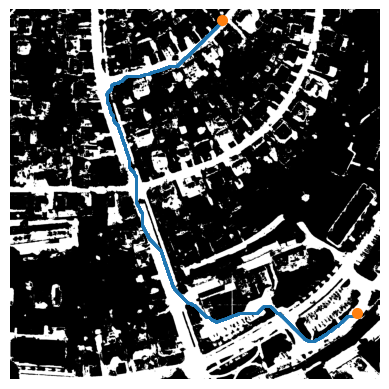

In [92]:
img_base = np.zeros([binary_mask.shape[0], binary_mask.shape[1],3]).astype(np.uint8)
img_base[binary_mask[:,:,0] == 0,:] = [0, 0, 0]
img_base[binary_mask[:,:,0] == 1,:] = [255, 255, 255]
plt.imshow(img_base)
plt.plot(x_coords, y_coords, marker='o', linestyle='', markersize=1)
plt.plot(x_cor_se, y_cor_se, marker='o', linestyle='', markersize=7)
plt.axis('off')
plt.savefig(prediction_save, pad_inches=0, dpi=200)

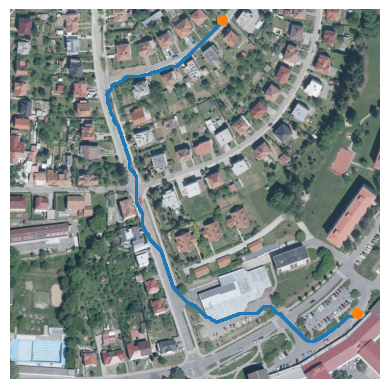

In [93]:
original = cv2.imread(image_path)
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
plt.imshow(original)
plt.plot(x_coords, y_coords, marker='o', linestyle='', markersize=1)
plt.plot(x_cor_se, y_cor_se, marker='o', linestyle='', markersize=7)
plt.axis('off')
plt.savefig(image_save, pad_inches=0, dpi=200)